In [1]:
import numpy as np

В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [2]:
x = [1, 3, 4]

sum_x = sum(x)
sum_x2 = sum(v**2 for v in x)
sum_x_minus_1_sq = sum((v - 1)**2 for v in x)

print("sum(x) =", sum_x)
print("sum(x^2) =", sum_x2)
print("sum((x-1)^2) =", sum_x_minus_1_sq)

sum(x) = 8
sum(x^2) = 26
sum((x-1)^2) = 13


**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [3]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [4]:
mean_wo_libraries = sum(sum_purchases)/len(sum_purchases)
mean_with_libraries = np.mean(sum_purchases)

print(mean_wo_libraries, mean_with_libraries)

667.95 667.95


Результати повністю співпали 

**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [5]:
median_wo_libraries = (sorted(sum_purchases)[len(sum_purchases)//2] +
                       sorted(sum_purchases)[len(sum_purchases)//2-1]) / 2
median_with_libraries = np.median(sum_purchases)

print(median_wo_libraries, median_with_libraries)

319.0 319.0


Як бачимо, у даному випадку середнє значення більш ніж удвічі перевищує медіану, що свідчить про наявність викидів у даних. 
Саме в таких випадках, коли дані розподілені нерівномірно, краще використовувати медіанне значення (наприклад, при оцінці вартості житла чи доходів населення). Середнє значення ж доцільно застосовувати тоді, коли дані є близькими до нормального розподілу (наприклад, при обчисленні середньої температури за місяць чи середньої оцінки студентів за виконання даного домашнього завдання😅).

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [6]:
x_minus_mean = [(el - mean_wo_libraries)**2 for el in sum_purchases]
std_wo_libraries = np.sqrt(sum(x_minus_mean)/(len(sum_purchases)))
std_with_libraries = np.std(sum_purchases)

print(std_wo_libraries, std_with_libraries)

1096.0692713054227 1096.0692713054227


**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [7]:
ages = np.array([16]*10 + [17]*25 + [18]*20 + [20]*2)
average_age = np.mean(ages)

print(average_age)

17.280701754385966


**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [8]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [9]:
purchases_visits = [ (sum_purchases[i] - mean_with_libraries) * (visits[i] - np.mean(visits)) for i in range(len(sum_purchases))]
cov = sum(purchases_visits) / (len(sum_purchases))
cov / (std_wo_libraries * np.std(visits))

-0.3026584468766645

In [10]:
np.corrcoef(sum_purchases, visits)[0, 1]

-0.3026584468766646

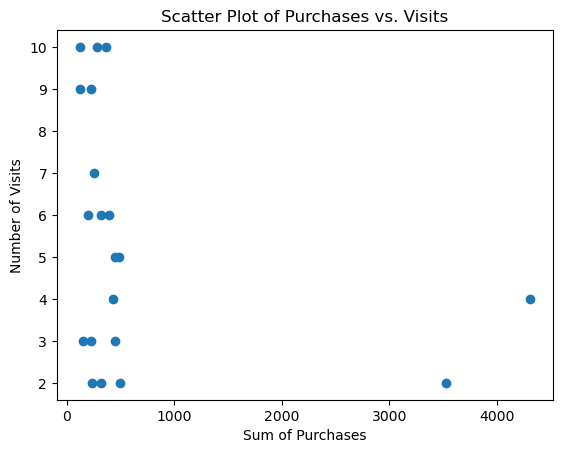

In [11]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Як бачимо, коефіцієнт кореляції вийшов незначним і судячи з графіку дійсно сильної лінійної залежності між кількістю візитів і сумою покупок скоріше за все немає. Але, на графіку також видно 2 сильних викиди по сумі покупок, які не дають нам визначити дійсний коефіцієнт кореляції 

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [12]:
# Обчислюємо threshold
threshold = mean_with_libraries+ 2*std_with_libraries
print("threshold = ", threshold)

threshold =  2860.0885426108453


In [13]:
# Фільтруємо викиди
filter = sum_purchases <= threshold
visits_clean = np.array(visits)[filter]
purchases_clean = np.array(sum_purchases)[filter]

# Кореляція Пірсона
corr = np.corrcoef(visits_clean, purchases_clean)[0, 1]
print("Коефіцієнт кореляції Пірсона = ", corr)

Коефіцієнт кореляції Пірсона =  -0.36852120781277986


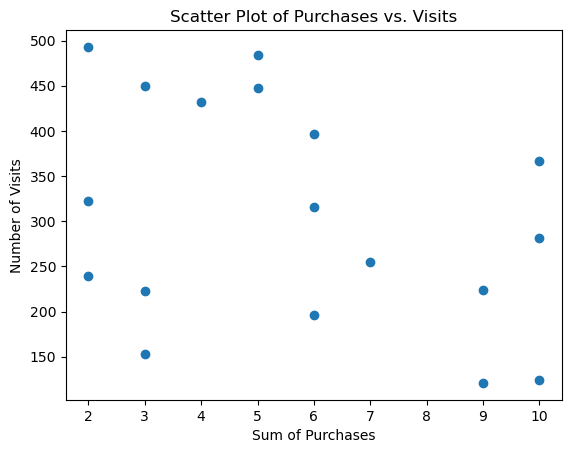

In [14]:
# Scatter plot
plt.scatter(visits_clean, purchases_clean)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Як і припускалося в завданні 6, залежність між показниками є незначною. Хоч вилучення викидів і дало змогу дещо покращити результати та отримати наочніший графік розсіювання, усе ж, якщо компанія має на меті збільшити суму покупок, не варто фокусуватися на кількості візитів. Доцільніше шукати інші показники з вищим рівнем кореляції.